# List resnet models from torch hub

In [2]:
from local_utilities import get_model_list
get_model_list()

['resnet18', 'resnet34', 'resnet50', 'resnet101', 'resnet152']

# Test TinyImageNetDatModule

Label_index:  {'Parasitic diseases': 0, 'Bacterial Red disease': 1, 'Bacterial diseases - Aeromoniasis': 2, 'Viral diseases White tail disease': 3, 'Healthy Fish': 4, 'Bacterial gill disease': 5, 'Fungal diseases Saprolegniasis': 6}
Label_index:  {'Parasitic diseases': 0, 'Bacterial Red disease': 1, 'Bacterial diseases - Aeromoniasis': 2, 'Viral diseases White tail disease': 3, 'Healthy Fish': 4, 'Bacterial gill disease': 5, 'Fungal diseases Saprolegniasis': 6}


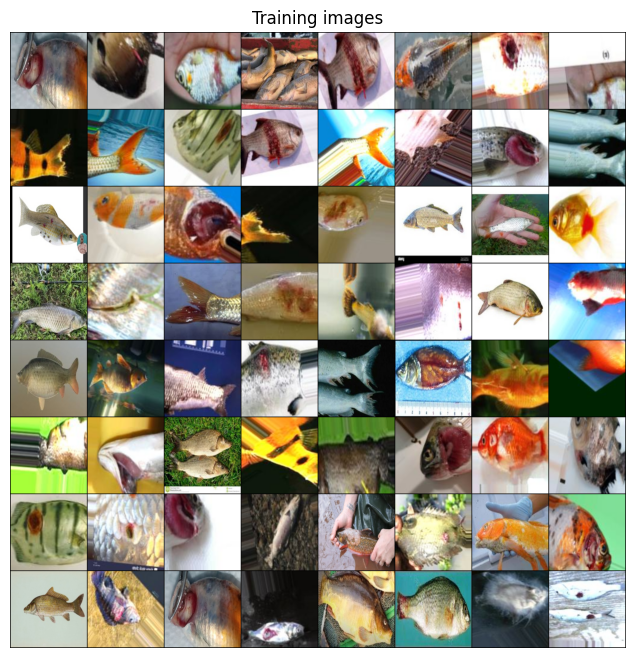

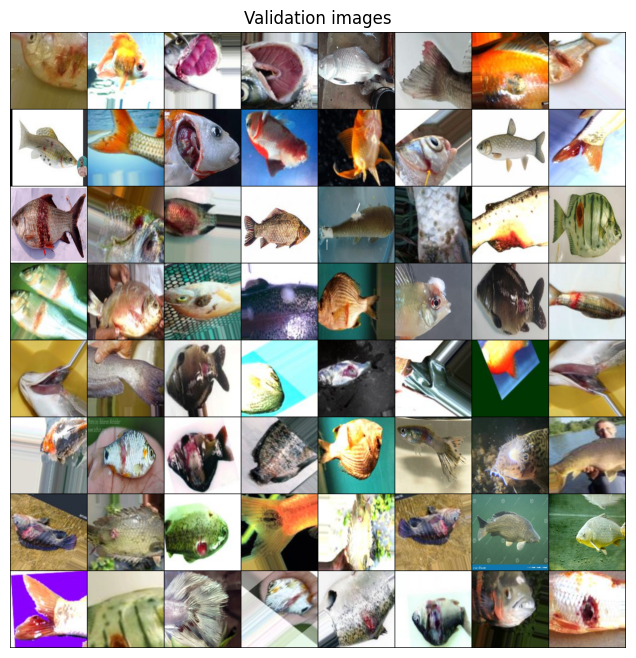

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
from local_utilities import LightningModel, FishDiseaseDataModule

dm = FishDiseaseDataModule(height_width=(224, 224), batch_size=64, num_workers=0)
dm.prepare_data()
dm.setup()

#print(f'dm.train.size = {len(dm.train)}')
#for i in range(len(dm.train)):
#    img, label = dm.train[i]
#    if img.shape != (3, 224, 224):
#        print(f'image[{i}].shape = {img.shape}')
#        print(f'image[{i}].path = {dm.train.images[i]} , image[{i}].label={label}')
#    print(f'image[{i}].shape = {img.shape}, label[{i}] = {label}')
#
#print(f'dm.val.size = {len(dm.val)}')
#for i in range(len(dm.val)):
#    img, label = dm.val[i]
#    print(f'image[{i}].shape = {img.shape}, label[{i}] = {label}')


for batch, (images, labels) in enumerate(dm.val_dataloader()):  
    plt.figure(figsize=(8, 8))
    plt.axis("off")
    plt.title("Training images")
    plt.imshow(np.transpose(torchvision.utils.make_grid(
        images[:64], 
        padding=2,
        normalize=True),
        (1, 2, 0)))
    plt.show()
    # print(f"Batch {batch}: len(images) = {len(images)}, len(labels) = {len(labels)}")
    break


for batch, (images, labels) in enumerate(dm.train_dataloader()):  
    plt.figure(figsize=(8, 8))
    plt.axis("off")
    plt.title("Validation images")
    plt.imshow(np.transpose(torchvision.utils.make_grid(
        images[:64], 
        padding=2,
        normalize=True),
        (1, 2, 0)))
    plt.show()
    # print(f"Batch {batch}: len(images) = {len(images)}, len(labels) = {len(labels)}")
    break


### Label index
- index=0, label=Parasitic diseases
- index=1, label=Bacterial Red disease 
- index=2, label=Bacterial diseases - Aeromoniasis
- index=3, label=Viral diseases White tail disease
- index=4, label=Healthy Fish
- index=5, label=Bacterial gill disease
- index=6, label=Fungal diseases Saprolegniasis

# Training/Validation loss and accuracy

FileNotFoundError: [Errno 2] No such file or directory: 'fish-disease-resnet18-augmented-loss.png'

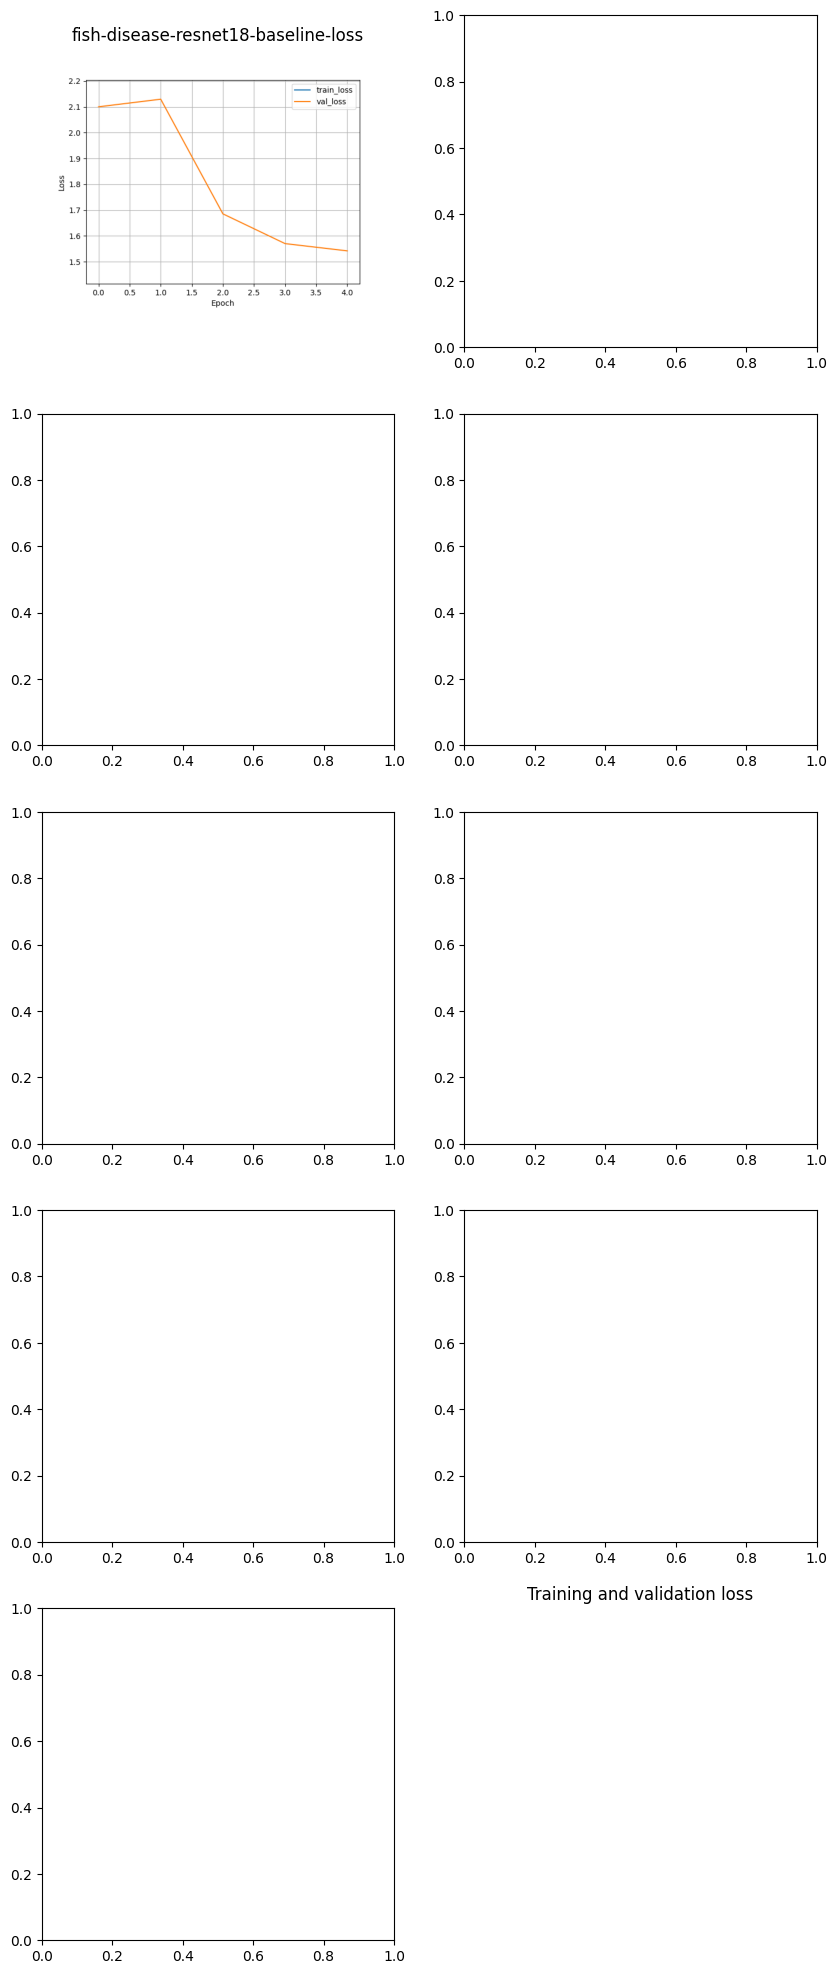

In [2]:
import matplotlib.pyplot as plt
from local_utilities import get_model_list
from PIL import Image

for metric_type in ['loss', 'acc']:
    model_list = get_model_list()
    num_rows = len(model_list)
    num_cols = 2

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))
    plt.title(f"Training and validation {metric_type}")
    plt.axis("off")

    for row, resnet_type in enumerate(model_list):
        for col, augmentation in enumerate(['baseline', 'augmented']):
                title = f"fish-disease-{resnet_type}-{augmentation}-{metric_type}"
                img = Image.open(f"{title}.png")
                axs[row, col].imshow(img)
                axs[row, col].set_title(title)
                axs[row, col].axis("off")
    plt.show()

# Test models

In [8]:
import lightning as L
import torch
from lightning.pytorch.loggers import CSVLogger
from local_utilities import LightningModel, FishDiseaseDataModule, get_model_list

def test_model(resnet_type, augmentation):
    model_name = f"fish-disease-{resnet_type}-{augmentation}"
    print(f"testing model {model_name}")

    if augmentation == "augmented":
        augment_data = True
    else:
        augment_data = False   

    dm = FishDiseaseDataModule(height_width=(224, 224), batch_size=64, num_workers=4, augment_data=augment_data)
   
    pytorch_model = torch.hub.load('pytorch/vision', resnet_type, weights=None)
    pytorch_model.load_state_dict(torch.load(f"{model_name}.pt"))

    L.pytorch.seed_everything(123)

    lightning_model = LightningModel(model=pytorch_model, learning_rate=0.1)

    trainer = L.Trainer(
        max_epochs=50,
        accelerator="auto",
        devices="auto",
        logger=CSVLogger(save_dir="logs/", name=model_name),
        deterministic=True,
    )

    trainer.test(model=lightning_model, datamodule=dm)

model_list = get_model_list()
for model in model_list:
    test_model(model, "baseline")
    test_model(model, "augmented")
    break

testing model fish-disease-resnet18-baseline


Using cache found in /Users/trieu.science/.cache/torch/hub/pytorch_vision_main
Seed set to 123
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Label_index:  {'Parasitic diseases': 0, 'Bacterial Red disease': 1, 'Bacterial diseases - Aeromoniasis': 2, 'Viral diseases White tail disease': 3, 'Healthy Fish': 4, 'Bacterial gill disease': 5, 'Fungal diseases Saprolegniasis': 6}
Label_index:  {'Parasitic diseases': 0, 'Bacterial Red disease': 1, 'Bacterial diseases - Aeromoniasis': 2, 'Viral diseases White tail disease': 3, 'Healthy Fish': 4, 'Bacterial gill disease': 5, 'Fungal diseases Saprolegniasis': 6}


/Users/trieu.science/NTU/Lessons/xu_ly_anh/trieu_bai_giang/FlaskApp4ImageProcessing/flask_appenv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:419: Consider setting `persistent_workers=True` in 'test_dataloader' to speed up the dataloader worker initialization.


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc                    0.0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
testing model fish-disease-resnet18-augmented


Using cache found in /Users/trieu.science/.cache/torch/hub/pytorch_vision_main
Seed set to 123
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Label_index:  {'Parasitic diseases': 0, 'Bacterial Red disease': 1, 'Bacterial diseases - Aeromoniasis': 2, 'Viral diseases White tail disease': 3, 'Healthy Fish': 4, 'Bacterial gill disease': 5, 'Fungal diseases Saprolegniasis': 6}
Label_index:  {'Parasitic diseases': 0, 'Bacterial Red disease': 1, 'Bacterial diseases - Aeromoniasis': 2, 'Viral diseases White tail disease': 3, 'Healthy Fish': 4, 'Bacterial gill disease': 5, 'Fungal diseases Saprolegniasis': 6}


Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.23000000417232513
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
